#Proper Data Cleaning is required for EDA Task 2 so i am using Task 1 to clean data.

#Task 1
## Data Cleaning & Preprocessing

Objective: Learn how to clean and prepare raw data for ML

## Import the Dataset and Explore Basic Info

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Dataset:



In [2]:
df = pd.read_csv('/content/Titanic-Dataset.csv')


### Explore Basic Info:



In [3]:
# Display the first few rows
print(df.head())

# Check data types and null values
print(df.info())

# Summary statistics
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

##Handle Missing Values

###Identify Missing Values:



In [4]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


###Handle Missing Values:



In [5]:
#For numerical features, you can use mean or median:
df['Age'] = df['Age'].fillna(df['Age'].median())  # Using median for Age
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())  # Using mean for Fare

In [6]:
#For categorical features, you can use mode or a placeholder:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Using mode for Embarked

## Convert Categorical Features into Numerical

###Encoding Categorical Features:


In [7]:
#Use one-hot encoding for nominal variables:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


##Normalize/Standardize Numerical Features


###Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


###Standardization

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


##Visualize Outliers Using Boxplots and Remove Them

###Visualize Outliers



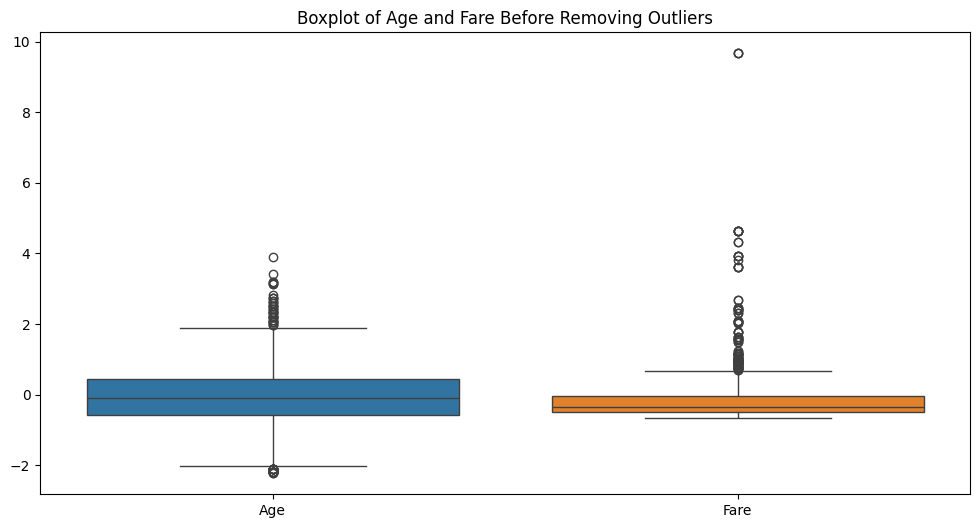

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare Before Removing Outliers')
plt.show()

###Remove Outliers



In [11]:
# Define thresholds for Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age


In [12]:
# Define thresholds for Fare
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare


In [13]:
# Remove outliers for Age
df = df[(df['Age'] >= (Q1_age - 1.5 * IQR_age)) & (df['Age'] <= (Q3_age + 1.5 * IQR_age))]


In [14]:
# Remove outliers for Fare
df = df[(df['Fare'] >= (Q1_fare - 1.5 * IQR_fare)) & (df['Fare'] <= (Q3_fare + 1.5 * IQR_fare))]


In [15]:
# Shape of the DataFrame after removing outliers
print(f"DataFrame shape after removing outliers: {df.shape}")


DataFrame shape after removing outliers: (721, 13)


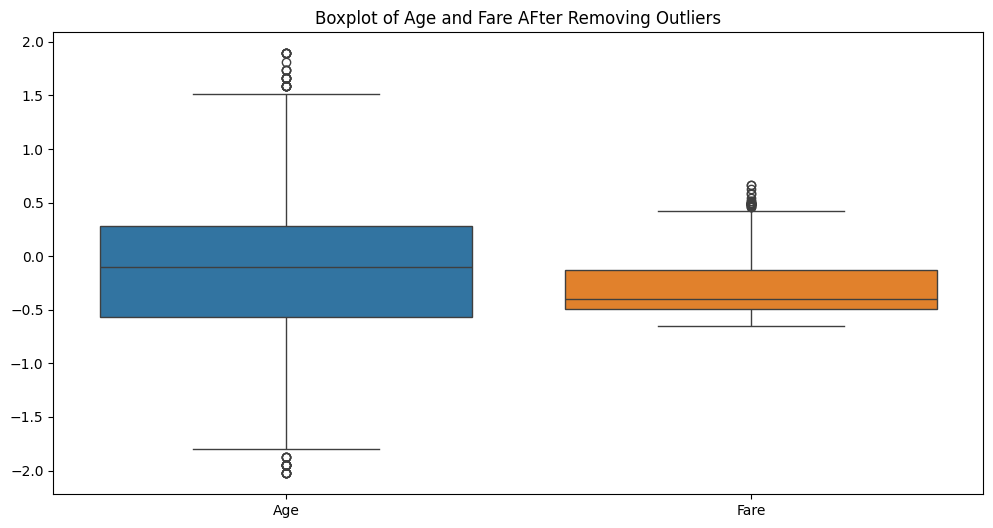

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare AFter Removing Outliers')
plt.show()

# Task 2
### Exploratory Data Analysis (EDA)

In [17]:
#Generate summary statistics
summary_stats = df.describe(include='all')
print(summary_stats)

        PassengerId    Survived      Pclass                 Name         Age  \
count    721.000000  721.000000  721.000000                  721  721.000000   
unique          NaN         NaN         NaN                  721         NaN   
top             NaN         NaN         NaN  Dooley, Mr. Patrick         NaN   
freq            NaN         NaN         NaN                    1         NaN   
mean     448.056865    0.337032    2.509015                  NaN   -0.097389   
std      259.664486    0.473024    0.717046                  NaN    0.770186   
min        1.000000    0.000000    1.000000                  NaN   -2.025883   
25%      220.000000    0.000000    2.000000                  NaN   -0.565736   
50%      448.000000    0.000000    3.000000                  NaN   -0.104637   
75%      674.000000    1.000000    3.000000                  NaN    0.279612   
max      891.000000    1.000000    3.000000                  NaN    1.893459   

             SibSp       Parch Ticket  

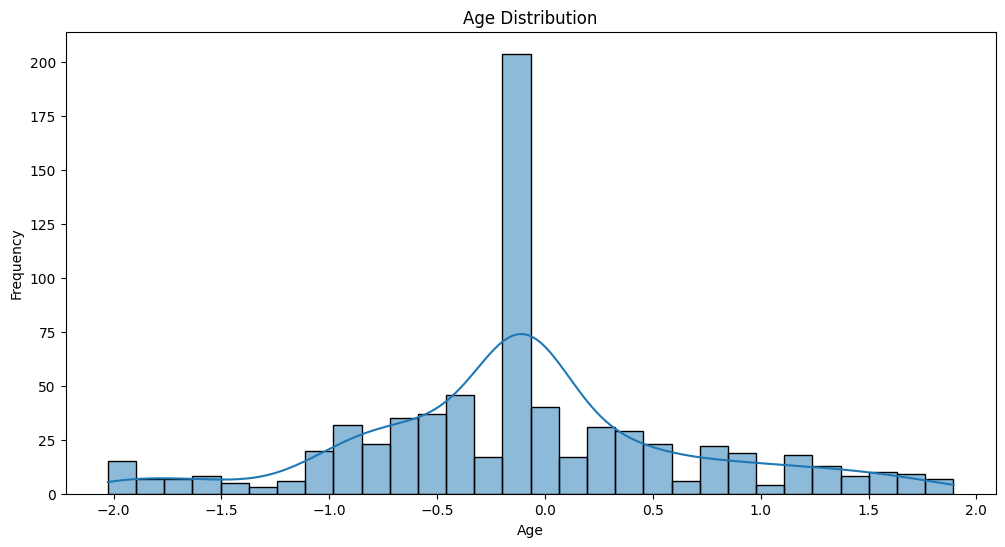

In [18]:
# Histogram for Age
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

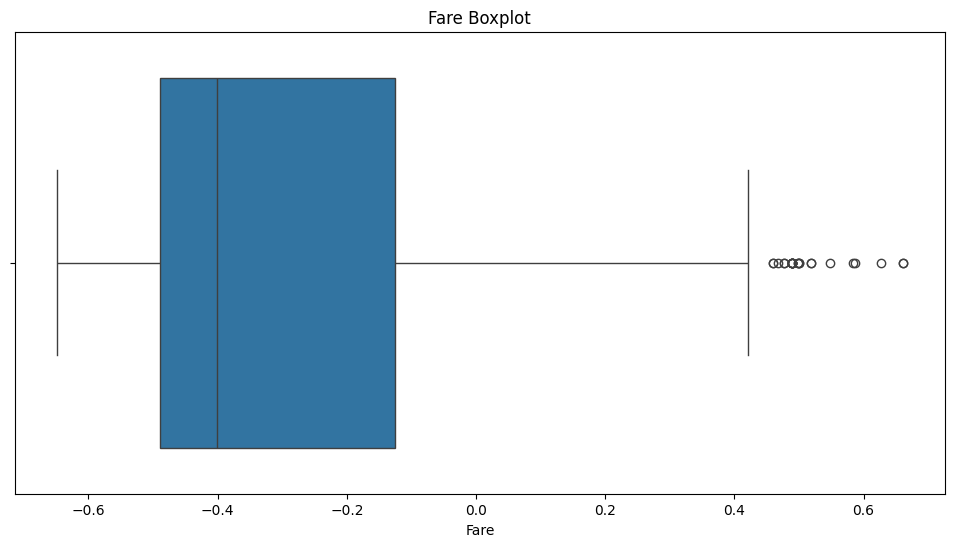

In [19]:
# Boxplot for Fare
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.xlabel('Fare')
plt.show()

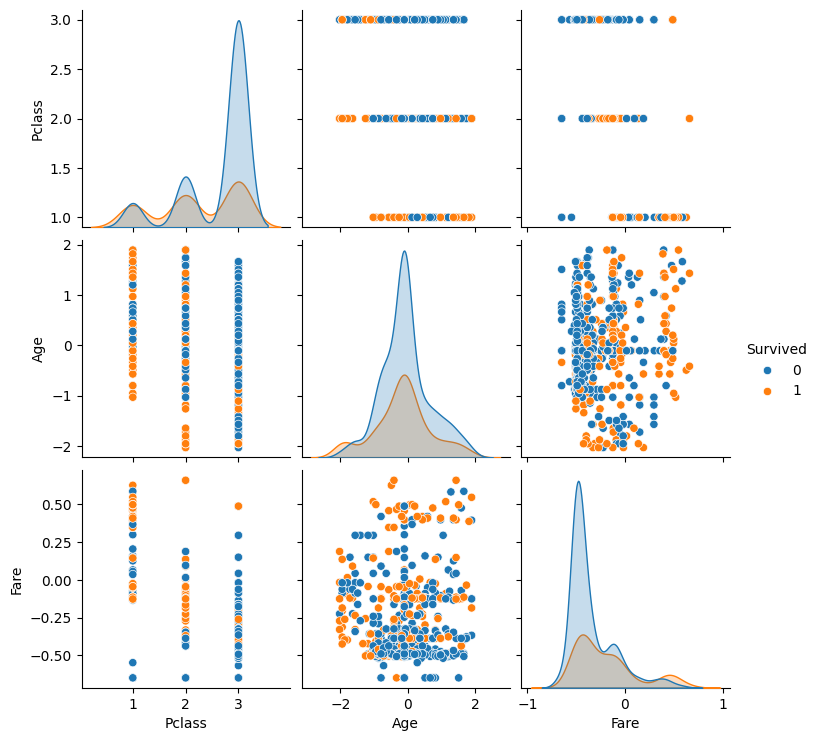

In [20]:
# Pairplot for numeric features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()

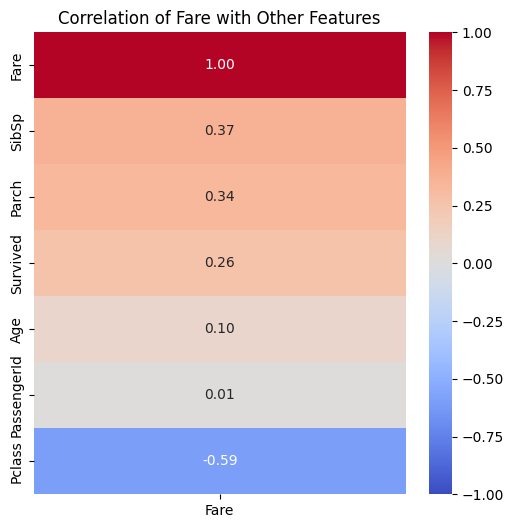

In [24]:
# Compute full correlation matrix of numeric columns
correlation_matrix = df.select_dtypes(include='number').corr()

# Filter the matrix to show only correlations involving 'Fare'
fare_corr = correlation_matrix[['Fare']].sort_values(by='Fare', ascending=False)

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(fare_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Fare with Other Features')
plt.show()

##Survival Rate Analysis

By Gender: Analyze the survival rates between male and female
passengers.

Expected Trend: Females are expected to have a higher survival rate than males.    

Survival Rate by Gender (Sex_male=0 is female, 1 is male):
Sex_male
False    0.688312
True     0.171429
Name: Survived, dtype: float64


<ipython-input-33-cf8032282367>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, palette='pastel')


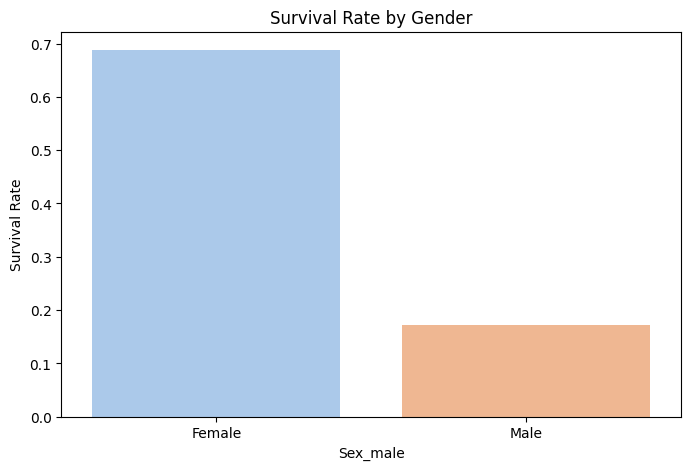

In [33]:
survival_by_gender = df.groupby('Sex_male')['Survived'].mean()
print("Survival Rate by Gender (Sex_male=0 is female, 1 is male):")
print(survival_by_gender)
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, palette='pastel')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()


##Age Distribution
By Survival: Visualize the age distribution of survivors vs. non-survivors.

Expected Trend: Younger passengers may have higher survival rates.    

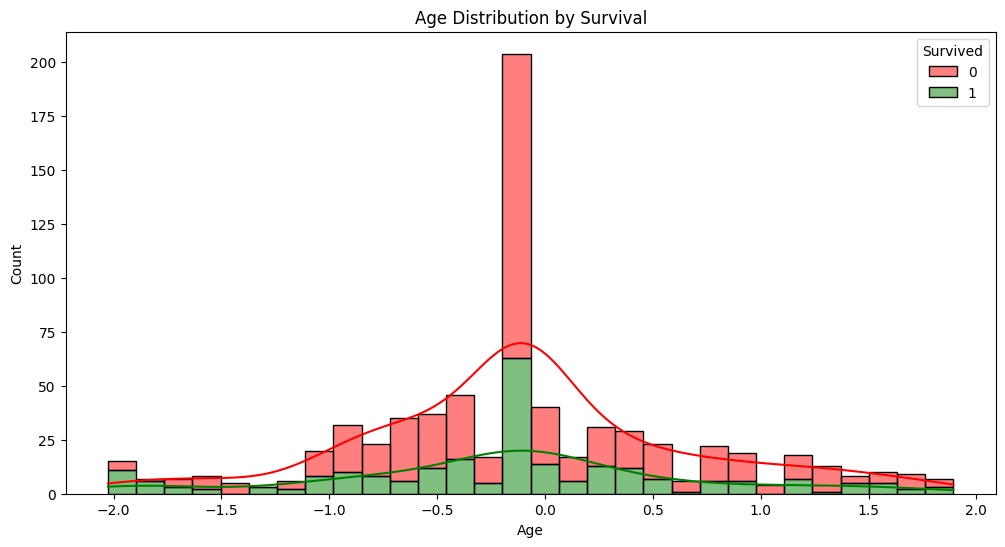

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True,
             palette={0: 'red', 1: 'green'})
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##Class and Survival
By Passenger Class: Analyze survival rates across different passenger classes (Pclass).

Expected Trend: First-class passengers are expected to have higher survival rates than those in second and third class.    


Survival Rate by Passenger Class:
Pclass
1    0.568421
2    0.475610
3    0.240260
Name: Survived, dtype: float64


<ipython-input-36-5b147464dd7b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='muted')


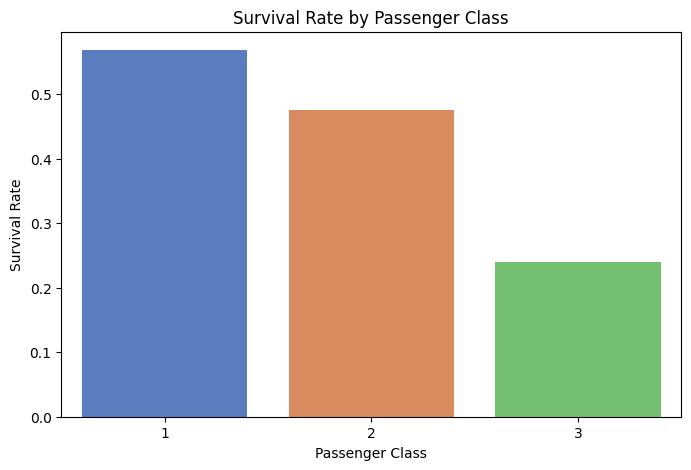

In [36]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_by_class)

plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='muted')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

##Fare Analysis
By Survival: Analyze the distribution of fare prices for survivors vs. non-survivors.

Expected Trend: Higher fares may correlate with higher survival rates.    

<ipython-input-37-a95b88771e37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette=['red', 'green'])


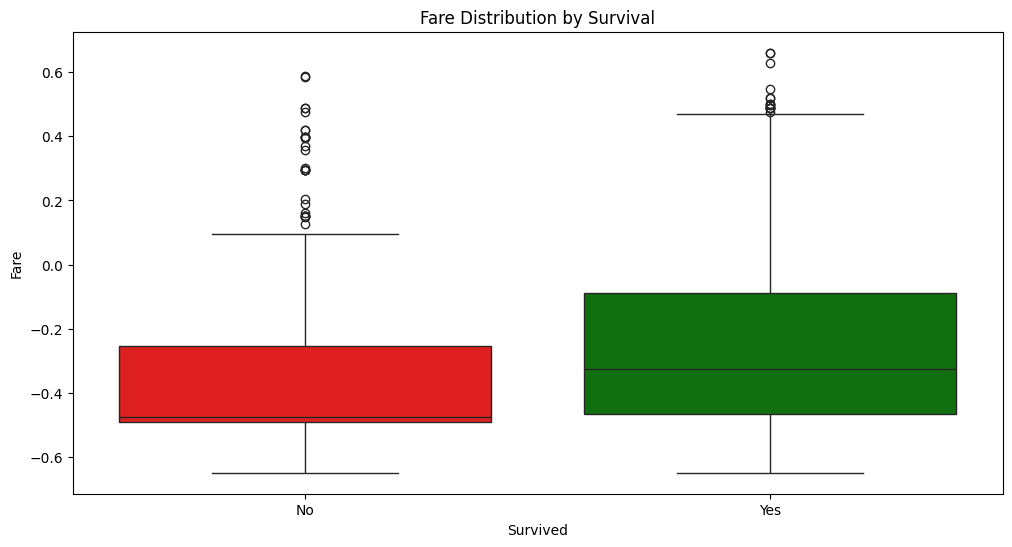

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Fare', data=df, palette=['red', 'green'])
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## Feature-Level Inferences

a. Gender
Inference: If the analysis shows that females have a significantly higher survival rate, you can infer that gender played a crucial role in survival during the Titanic disaster.    
b. Age
Inference: If younger passengers tend to have higher survival rates, it may suggest that children and young adults were prioritized during evacuation.    
c. Passenger Class
Inference: If first-class passengers have a higher survival rate, it indicates that socio-economic status influenced survival chances.    
d. Fare
Inference: If higher fares correlate with higher survival rates, it suggests that wealthier passengers had better access to lifeboats.

##Summary of Findings

*  Gender: Females had a higher survival rate.
*  Age: Younger passengers were more likely to survive.
*  Class: First-class passengers had the highest survival rates.
*  Fare: Higher fares were associated with higher survival rates.    